# 1DCNN_IRIS_Pytorch
https://github.com/cserajdeep/1DCNN-IRIS-PyTorch/blob/main/1DCNN_IRIS_Pytorch.ipynb

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Load and preprocess the data
iris = load_iris()
X = iris.data
y = iris.target
names = iris['target_names']
feature_names = iris['feature_names']

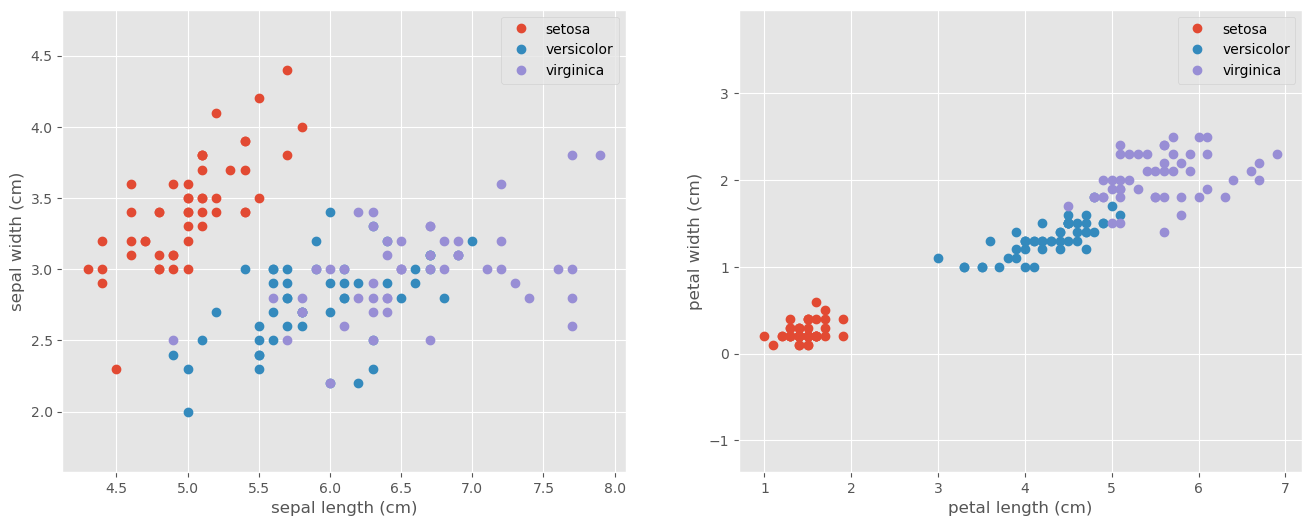

In [15]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
# 1D CNN Model
class IrisCNN(nn.Module):
    def __init__(self):
        super(IrisCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.fc = nn.Linear(16 * 2, 3)  # Adjust the input size to the FC layer

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)  # Flatten the tensor to prepare for the FC layer
        x = self.fc(x)
        return x

In [18]:
model = IrisCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:
# Training function
def train(model, criterion, optimizer, loader):
    model.train()
    total_loss = 0
    for data, targets in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [20]:
# Evaluation function
def evaluate(model, loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, targets in loader:
            output = model(data)
            _, predicted = torch.max(output, 1)
            correct += (predicted == targets).sum().item()
    return correct / len(loader.dataset)

In [21]:
# Train and evaluate the model
num_epochs = 300
for epoch in range(num_epochs):
    loss = train(model, criterion, optimizer, train_loader)
    accuracy = evaluate(model, test_loader)
    if epoch % 30 == 0:
        print(f'Epoch {epoch + 1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}')

Epoch 1: Loss = 1.2439, Accuracy = 0.2444
Epoch 31: Loss = 0.7497, Accuracy = 0.7778
Epoch 61: Loss = 0.5249, Accuracy = 0.8667
Epoch 91: Loss = 0.3412, Accuracy = 0.9111
Epoch 121: Loss = 0.2535, Accuracy = 0.9333
Epoch 151: Loss = 0.2222, Accuracy = 1.0000
Epoch 181: Loss = 0.1827, Accuracy = 1.0000
Epoch 211: Loss = 0.1363, Accuracy = 1.0000
Epoch 241: Loss = 0.1437, Accuracy = 1.0000
Epoch 271: Loss = 0.1156, Accuracy = 1.0000
